In [92]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [93]:
df=pd.read_pickle("golden_data_dummy.pkl")
df2=pd.read_pickle("golden_data_not_dummy.pkl")
pd.set_option('display.max_columns', None)

In [94]:
df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control,make_Audi,make_Opel,make_Renault,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,1,15770,3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,1798.0,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,5.6,0,14500,2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,4.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,0,14640,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1422.0,66.0,73000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1

In [95]:
df.shape

(14990, 136)

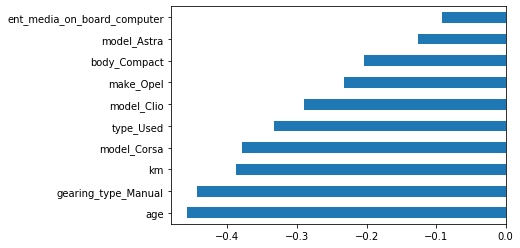

In [96]:
df.corr()["price"].sort_values().head(10).plot.barh()

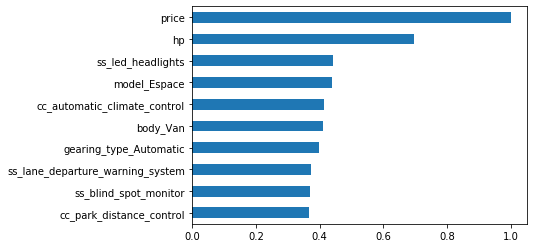

In [97]:
df.corr()["price"].sort_values().tail(10).plot.barh()

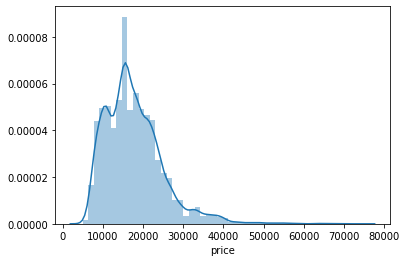

In [98]:
sns.distplot(df.price)

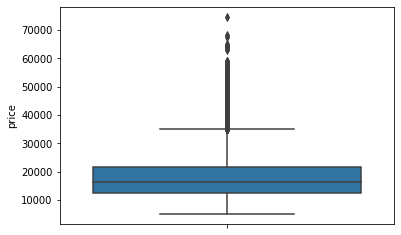

In [99]:
sns.boxplot(df.price, orient="v")

In [100]:
X=df.drop(["price"], axis=1)
y=df["price"]

In [101]:
X.shape

(14990, 135)

In [102]:
y.shape

(14990,)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [104]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

**1.Linear Regression**

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
lm = LinearRegression()

In [107]:
lm.fit(X_train, y_train)

LinearRegression()

In [108]:
lm.intercept_

12863.602080585439

In [109]:
lm.coef_

array([-1.07324683e+00,  1.00166983e+02, -3.66043273e-02, -4.31072316e+01,
       -2.11696074e+01,  2.90467232e+02,  1.47113286e+02, -4.26342916e+02,
       -2.45857390e+02,  1.44234756e+01, -2.93066855e+02, -1.16108907e+01,
       -1.62343964e+02, -2.49233364e+02,  3.14435352e+01, -8.25700143e+02,
       -1.68410690e+02, -6.39788701e+01, -2.52627947e+02, -3.36816275e+02,
       -2.21937795e+02,  6.50316165e+02,  7.88768070e+02,  5.31963200e+02,
        5.00522695e+02, -4.61395475e+02, -5.70148532e+02,  1.39061715e+02,
        1.34225323e+02,  2.11425107e+02,  1.86571437e+01, -4.13212783e+02,
        1.22899206e+02, -1.10716807e+02, -1.60110802e+03, -5.85909249e+02,
        1.44819775e+02,  9.04394102e+02, -7.91700474e+01, -8.95007277e+01,
        7.50148324e+00,  3.55613012e+02, -1.90184859e+02, -1.39196020e+03,
       -1.95752826e+02,  3.11567861e+02,  3.60531806e+01, -8.14980053e+01,
        3.51648412e+02,  3.35134852e+02, -4.18921989e+01,  2.67668171e+02,
       -2.30397964e+02,  

In [110]:
y_pred = lm.predict(X_test)

In [111]:
eval_metrics(y_test, y_pred)

r2_score: 0.8917673810996826 
 mae: 1672.386762666874 
 mse: 5481554.524313132 
 rmse: 2341.2719885380966


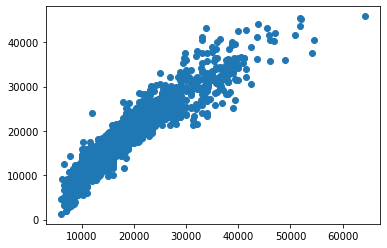

In [112]:
plt.scatter(y_test, y_pred)

In [113]:
my_dict = {"Actual" : y_test, "Pred" :y_pred}

In [114]:
compare=pd.DataFrame(my_dict)

In [115]:
compare.sample(5)

,Actual,Pred
14157,9870,11728.573821
5165,26900,24900.083456
2610,21789,24070.212453
13277,12545,13157.899418
3250,18700,17268.090992


**crossvalidation**

In [116]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator=lm, X=X_train, y=y_train, cv=5)
cv_scores.mean()

0.8853675809888808

In [117]:
cv_scores

array([0.88213508, 0.88024083, 0.89031947, 0.88202718, 0.89211535])

In [118]:
#accuraries = cross_val_score(estimator=lm, X=X_train, y=y_train, scoring = "neg_mean_squared_error", cv=10)
#-accuraries.mean()

In [119]:
#accuraries = cross_val_score(estimator=lm, X=X_train, y=y_train, scoring = "neg_mean_absolute_error", cv=10)
#-accuraries.mean()

**Ridge Regression**

In [120]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [121]:
ridge_model = Ridge(normalize=True)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [122]:
eval_metrics(y_test, y_pred)

r2_score: 0.8390485500575233 
 mae: 1963.3528962238245 
 mse: 8151555.026488917 
 rmse: 2855.092822744808


In [124]:
ridge_model.alpha

1.0

In [125]:
alpha_space = np.linspace(0.1, 20, 100)

In [126]:
alpha_space

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

In [127]:
ridgecv = RidgeCV(alphas = alpha_space, normalize =True, cv = 5)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=5, normalize=True)

In [128]:
ridgecv.alpha_

0.1

In [129]:
ridge_model = Ridge(alpha=0.01, normalize=True)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [130]:
eval_metrics(y_test, y_pred)

r2_score: 0.892059606321106 
 mae: 1668.7977194129369 
 mse: 5466754.471418843 
 rmse: 2338.109165847233


**Lasso Regression**

In [131]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [132]:
lasso_model = Lasso(normalize=True)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8840377602740636 
 mae: 1698.8273169126865 
 mse: 5873029.2796909 
 rmse: 2423.4333660513344


In [133]:
lassocv = LassoCV(alphas = alpha_space, normalize =True, cv = 5)
lassocv.fit(X_train, y_train)

LassoCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=5, normalize=True)

In [134]:
lassocv.alpha_

0.1

In [135]:
lasso_model = Lasso(alpha=0.1, normalize=True)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8917796626649902 
 mae: 1668.1568590125214 
 mse: 5480932.511554302 
 rmse: 2341.1391482682743


**without normalization**

In [136]:
lassocv = LassoCV(alphas = alpha_space, normalize =False, cv = 5)
lassocv.fit(X_train, y_train)

LassoCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=5)

In [137]:
lassocv.alpha_

1.9090909090909092

In [138]:
# alpha is greater

In [139]:
lasso_model = Lasso(alpha=1.9, normalize=False)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8922267238842932 
 mae: 1669.6202221841133 
 mse: 5458290.62711859 
 rmse: 2336.2984884467546


In [140]:
# and the score is better

In [141]:
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})

In [142]:
feature_coef.head()

,features,coef
0,displacement,-1.037187
1,hp,101.999072
2,km,-0.036668
3,ss_abs,-15.806944
4,ss_adaptive_cruise_control,0.000000


In [143]:
feature_coef.shape

(135, 2)

In [144]:
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

109

In [145]:
lasso_model = Lasso(alpha=500, normalize=False)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.7372915206805915 
 mae: 2659.594994235042 
 mse: 13305146.526252115 
 rmse: 3647.622037197949


In [146]:
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

6

In [147]:
significant_features.sort_values(by="coef", ascending=False)

,features,coef
90,make_Audi,1781.731847
1,hp,187.034927
0,displacement,0.753381
2,km,-0.059166
91,make_Opel,-692.261513
34,age,-841.612429


**Random Forest Regressor**

In [149]:
from sklearn.ensemble import RandomForestRegressor

In [150]:
rf_reg = RandomForestRegressor()

In [151]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [152]:
y_pred = rf_reg.predict(X_test)

In [153]:
eval_metrics(y_test, y_pred)

r2_score: 0.9554948990900822 
 mae: 856.1904162582005 
 mse: 2254007.5231151697 
 rmse: 1501.3352467437676


In [154]:
cv_scores = cross_val_score(estimator=rf_reg, X=X_train, y=y_train, cv=3)
cv_scores.mean()

0.9502417559356737

**RF Feature Importance**

In [155]:
rf_reg.feature_importances_

array([1.02389262e-02, 4.60155803e-01, 7.13880917e-02, 2.32312839e-04,
       6.99078994e-04, 3.45228445e-04, 5.88713792e-04, 3.81853685e-04,
       3.28682454e-04, 2.24939575e-04, 3.76812600e-04, 1.09009386e-04,
       2.37564628e-04, 3.38870163e-04, 4.05725764e-04, 2.19760082e-04,
       6.40932723e-04, 2.17868706e-04, 4.70290056e-04, 7.79881783e-04,
       4.70113027e-04, 1.64344638e-03, 5.44722293e-04, 6.01338207e-05,
       2.54788585e-04, 1.52334115e-03, 1.96551311e-04, 3.10163152e-04,
       4.28144577e-04, 3.49663664e-04, 2.81719951e-04, 5.90894515e-04,
       6.77836921e-03, 4.42707365e-04, 1.89342997e-01, 3.85272168e-03,
       5.28065420e-04, 4.14479300e-04, 4.84513424e-04, 4.39534342e-04,
       3.50778280e-04, 8.57394642e-04, 5.40314400e-04, 8.29619531e-05,
       6.28998114e-04, 1.08771926e-03, 2.35448920e-03, 8.19434549e-04,
       2.08639993e-04, 4.75683610e-05, 5.01675919e-04, 6.99363519e-04,
       1.05556909e-04, 4.28549906e-04, 0.00000000e+00, 5.65118126e-04,
      

In [156]:
importance = pd.DataFrame({'importance':rf_reg.feature_importances_}, 
                          index = X_train.columns)

In [157]:
importance.sort_values(by="importance", ascending = False).head(10)

,importance
hp,0.460156
age,0.189343
km,0.071388
model_Espace,0.062299
make_Audi,0.060886
gearing_type_Manual,0.019073
cc_park_distance_control,0.017723
model_Astra,0.010717
displacement,0.010239
model_A3,0.008881


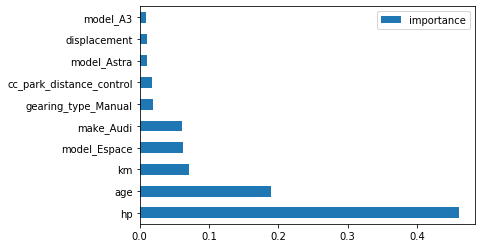

In [158]:
importance.sort_values(by="importance", ascending = False).head(10).plot.barh()

In [159]:
df2.head()

,displacement,make,model,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,body,body_color,gearing_type,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,fuel,nr_of_doors,nr_of_seats,type,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control
0,1422.0,Audi,A1,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,Sedans,Black,Automatic,1,15770,3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,diesel,5.0,5.0,Used,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1798.0,Audi,A1,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,5.6,Sedans,Red,Automatic,0,14500,2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,gasoline,3.0,4.0,Used,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1598.0,Audi,A1,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,Sedans,Black,Automatic,0,14640,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,diesel,4.0,4.0,Used,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1422.0,Audi,A1,66.0,73000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.8,Sedans,Brown,Automatic,0,14500,3,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,diesel,3.0,4.0,Used,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1422.0,Audi,A1,66.0,16200,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4.1,Sedans,Black,Automatic,1,16790,3,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,diesel,5.0,5.0,Used,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [160]:
df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control,make_Audi,make_Opel,make_Renault,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,1,15770,3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,1798.0,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,5.6,0,14500,2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,4.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,0,14640,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1422.0,66.0,73000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1

In [161]:
df2.shape

(14994, 98)

**Feature Selection with RF**

In [162]:
new_list = ["age", "model", "hp", "km"]  #feature selection

In [163]:
X = df2[new_list]
y = df2["price"]

In [164]:
X.shape

(14994, 4)

In [165]:
X = pd.get_dummies(X)

In [166]:
X.shape

(14994, 11)

In [167]:
X.head()

,age,hp,km,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia
0,3,66.0,56013,1,0,0,0,0,0,0,0
1,2,141.0,80000,1,0,0,0,0,0,0,0
2,3,85.0,83450,1,0,0,0,0,0,0,0
3,3,66.0,73000,1,0,0,0,0,0,0,0
4,3,66.0,16200,1,0,0,0,0,0,0,0


In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [169]:
rf_reg = RandomForestRegressor()

In [170]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [171]:
y_pred = rf_reg.predict(X_test)

In [172]:
eval_metrics(y_test, y_pred)

r2_score: 0.9008166884974576 
 mae: 1462.7849186434753 
 mse: 5343029.284375653 
 rmse: 2311.4993585064335


In [173]:
accuraries = cross_val_score(estimator=rf_reg, X=X_train, y=y_train, cv=5)
accuraries.mean()

0.8915420952193746

**RF Model Tunning**

In [174]:
rf_params = {"n_estimators":[50, 100, 300],
              "max_depth":[3,5,7],
              "max_features": [2,4,6,8],
              "min_samples_split": [2,4,6]}

In [ ]:
rf_cv_model = GridSearchCV(rf_reg, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
rf_cv_model.best_params_

In [ ]:
rf_tuned = RandomForestRegressor(max_features = 6,
                                min_samples_split = 4,
                                 n_estimators = 300)
rf_tuned.fit(X_train, y_train)

In [ ]:
y_pred = rf_tuned.predict(X_test)
eval_metrics(y_test,y_pred)

In [ ]:
accuraries = cross_val_score(estimator=rf_tuned, X=X_train, y=y_train, cv=5)
accuraries.mean()

In [ ]:
import pickle
pickle.dump(rf_tuned, open('rf_tuned', 'wb'))

In [ ]:
my_model = pickle.load(open('rf_tuned', 'rb'))

**XGBOOST Regressor**

In [ ]:
X=df.drop(['price'], axis=1)
y=df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
import xgboost

In [ ]:
model_xg = xgboost.XGBRegressor()
model_xg.fit(X_train, y_train)

In [ ]:
y_pred = model_xg.predict(X_test)

In [ ]:
eval_metrics(y_test, y_pred)

**with 4 columns**

In [ ]:
new_list=["hp", "age", "km", "model"]

In [ ]:
X=df2[new_list]
y=df2['price']
X=pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
model = xgboost.XGBRegressor()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
eval_metrics(y_test, y_pred)

**gridsearch with xgboost**

In [ ]:
xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb_cv_model  = GridSearchCV(model,xgb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [ ]:
xgb_cv_model.best_params_

In [ ]:
xgb_tuned = xgboost.XGBRegressor(subsample = 1, 
                         learning_rate = 0.1, 
                         max_depth = 7, 
                         n_estimators = 100).fit(X_train, y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)
eval_metrics(y_test,y_pred)